In [104]:
import torch
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

In [105]:
%matplotlib inline

In [106]:
def plot_animation(data, saving_name, interval=800):
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.animation import FuncAnimation,PillowWriter

    # Example tensor with shape [16, 155, 155]
    # Replace this with your actual tensor data
    tensor = data

    # Set up the figure and axes
    fig, ax = plt.subplots()
    fig.tight_layout(pad=1.0)
    
    im = ax.imshow(tensor[0], animated=True, cmap='viridis')  # Example colormap
    frame_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, color="red", fontsize=16)

    # Set the title of the plot
    # ax.set_title("Frame 0")  # Initial title

    def animate(i):
        # Update the image data and frame number text
        im.set_data(tensor[i])
        frame_text.set_text(f'Frame {i}')
        # ax.set_title(f"Frame {i}")  # Update the title for each frame
        return im, frame_text

    # Create the animation
    anim = FuncAnimation(fig, animate, frames=len(tensor), interval=interval, blit=True)

    anim.save(f'{saving_name}.gif', writer="pillow")

In [107]:
states = torch.load(feats_path)

In [69]:
xy_emb = states[0]['embeddings.18'][0,...].to('cpu')
yz_emb = states[0]['embeddings.19'][0,...].to('cpu')
xz_emb = states[0]['embeddings.20'][0,...].to('cpu')
xy_emb.shape, yz_emb.shape, xz_emb.shape

(torch.Size([8, 155, 155]),
 torch.Size([8, 155, 155]),
 torch.Size([8, 155, 155]))

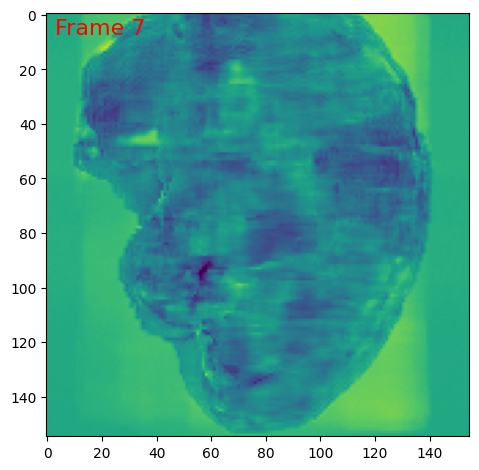

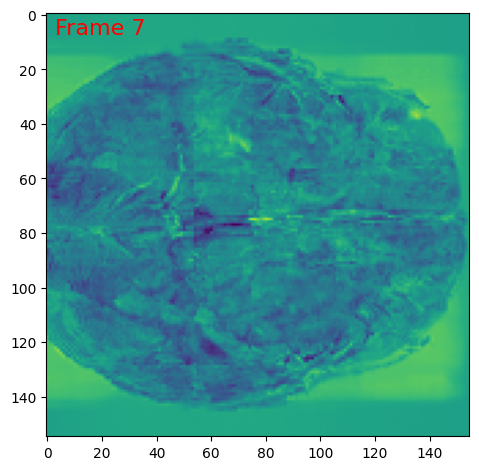

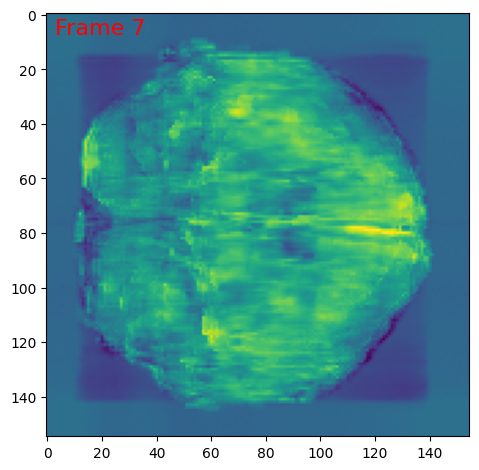

In [81]:
plot_animation(xy_emb, "8_xy")
plot_animation(yz_emb, "8_yz")
plot_animation(xz_emb, "8_xz")

In [87]:
states[0].keys()

odict_keys(['embeddings.0', 'embeddings.1', 'embeddings.2', 'embeddings.3', 'embeddings.4', 'embeddings.5', 'embeddings.6', 'embeddings.7', 'embeddings.8', 'embeddings.9', 'embeddings.10', 'embeddings.11', 'embeddings.12', 'embeddings.13', 'embeddings.14', 'embeddings.15', 'embeddings.16', 'embeddings.17', 'embeddings.18', 'embeddings.19', 'embeddings.20', 'embeddings.21', 'embeddings.22', 'embeddings.23', 'embeddings.24', 'embeddings.25', 'embeddings.26', 'embeddings.27', 'embeddings.28', 'embeddings.29', 'embeddings.30', 'embeddings.31', 'embeddings.32', 'embeddings.33', 'embeddings.34', 'embeddings.35', 'embeddings.36', 'embeddings.37', 'embeddings.38', 'embeddings.39', 'embeddings.40', 'embeddings.41', 'embeddings.42', 'embeddings.43', 'embeddings.44', 'embeddings.45', 'embeddings.46', 'embeddings.47', 'embeddings.48', 'embeddings.49', 'embeddings.50', 'embeddings.51', 'embeddings.52', 'embeddings.53', 'embeddings.54', 'embeddings.55', 'embeddings.56', 'embeddings.57', 'embeddings.

In [108]:
xy_idx = np.arange(50)*3
yz_idx = np.arange(50)*3 + 1
xz_idx = np.arange(50)*3 + 2
xy_idx, yz_idx, xz_idx

(array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
         39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
         78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
        117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147]),
 array([  1,   4,   7,  10,  13,  16,  19,  22,  25,  28,  31,  34,  37,
         40,  43,  46,  49,  52,  55,  58,  61,  64,  67,  70,  73,  76,
         79,  82,  85,  88,  91,  94,  97, 100, 103, 106, 109, 112, 115,
        118, 121, 124, 127, 130, 133, 136, 139, 142, 145, 148]),
 array([  2,   5,   8,  11,  14,  17,  20,  23,  26,  29,  32,  35,  38,
         41,  44,  47,  50,  53,  56,  59,  62,  65,  68,  71,  74,  77,
         80,  83,  86,  89,  92,  95,  98, 101, 104, 107, 110, 113, 116,
        119, 122, 125, 128, 131, 134, 137, 140, 143, 146, 149]))

In [109]:
xy_embs = torch.zeros(50,16,155,155)
yz_embs = torch.zeros(50,16,155,155)
xz_embs = torch.zeros(50,16,155,155)

In [110]:
xy_embs.shape

torch.Size([50, 16, 155, 155])

In [111]:
for idx, (xy, yz, xz) in enumerate(zip(xy_idx, yz_idx, xz_idx)):
    xy_embs[idx] = states[0][f"embeddings.{xy}"][0,...].to('cpu')
    yz_embs[idx] = states[0][f"embeddings.{yz}"][0,...].to('cpu')
    xz_embs[idx] = states[0][f"embeddings.{xz}"][0,...].to('cpu')

In [112]:
xy_mean = xy_embs.mean(dim=0)
yz_mean = yz_embs.mean(dim=0)
xz_mean = xz_embs.mean(dim=0)
print(xy_mean.mean(), xy_mean.std())
print(yz_mean.mean(), yz_mean.std())
print(xz_mean.mean(), xz_mean.std())

tensor(0.0001) tensor(0.0317)
tensor(0.0012) tensor(0.0309)
tensor(-0.0050) tensor(0.0331)


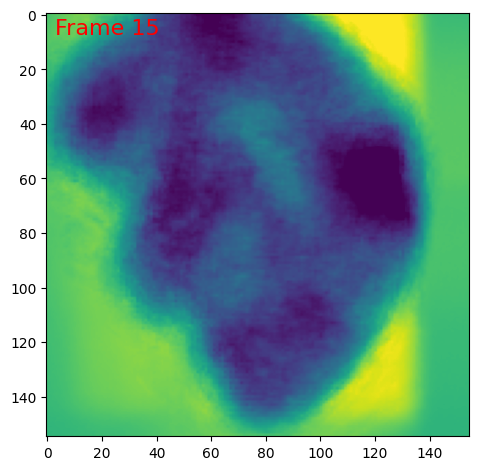

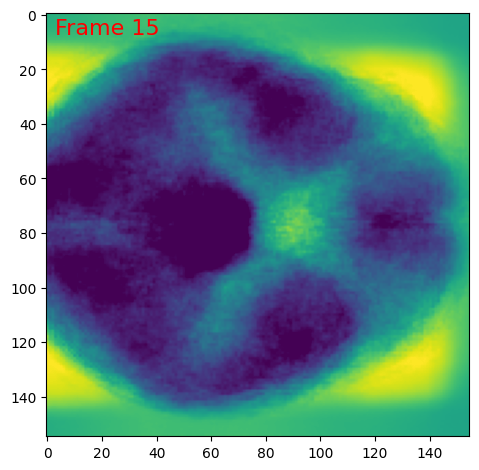

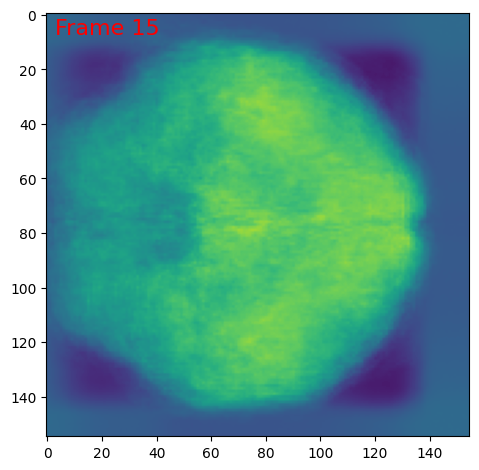

In [113]:
plot_animation(xy_mean, "16_xy_m")
plot_animation(yz_mean, "16_yz_m")
plot_animation(xz_mean, "16_xz_m")